In [12]:
import os
from astropy.io import fits
import sunpy.map
#from sunpy.coordinates import NorthOffsetFrame
import astropy.units as u
import numpy as np
from astropy.coordinates import SkyCoord
from sunpy.coordinates import frames
import matplotlib.pyplot as plt
import matplotlib.colors
import glob
from scipy import ndimage
import numpy as np
#import sunpy.timeseries
import scipy.ndimage as ndimage
from scipy.ndimage import label
from scipy.optimize import curve_fit
from scipy.interpolate import RegularGridInterpolator
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
import ast  
import seaborn as sns

In [2]:
import pandas as pd

In [40]:
folder_path = "/home/vindia/samapti/cycle24(feb-july)/CR2149/TF3CR"
save_dir = "/home/vindia/samapti/cycle24(feb-july)/CR2149"
txt_files =sorted(glob.glob(os.path.join(folder_path, "*.txt")))
with open(txt_files[5], "r") as f:
    print(txt_files[5])
    data = [ast.literal_eval(line.strip()) for line in f]
df=pd.DataFrame(data, columns=["patchid", "meantd", "maxtd", "mintd","lamda","phi","day","TFlux","maxTotflux","meanTotflux","flags"])
df.head()

/home/vindia/samapti/cycle24(feb-july)/CR2149/TF3CR/CR6.txt


,patchid,meantd,maxtd,mintd,lamda,phi,day,TFlux,maxTotflux,meanTotflux,flags
0,325,24.598329,26.002419,23.311326,325.0,-2.5,1,6.534228e+22,3.752820e+20,3.475653e+18,1
1,237,27.362044,29.268403,25.535887,235.0,17.5,2,1.889910e+22,2.037068e+20,1.055816e+18,1
2,238,27.362044,29.268403,25.535887,235.0,27.5,2,1.689000e+22,2.037068e+20,1.017470e+18,1
3,185,35.551683,36.262354,34.530530,185.0,-2.5,3,1.176134e+23,6.027202e+20,6.256033e+18,1
4,195,34.451709,35.623047,33.026710,195.0,-2.5,3,2.126515e+22,2.210609e+20,1.131125e+18,1


In [52]:
df.shape

(360, 11)

In [42]:
df.sample(5)

,patchid,meantd,maxtd,mintd,lamda,phi,day,TFlux,maxTotflux,meanTotflux,flags
289,289,21.669585,21.915095,21.581521,285.0,37.5,7,6.362568e+20,2.435538e+19,4.241712e+16,0
306,306,22.389433,23.288555,21.738449,305.0,7.5,7,6.871782e+20,2.032703e+19,3.674750e+16,0
42,23,21.302126,23.034456,19.948221,25.0,-22.5,7,2.654086e+22,6.271300e+20,1.534154e+18,0
74,55,19.456947,20.009105,19.251056,55.0,-2.5,7,2.332941e+22,1.589254e+20,1.240926e+18,0
211,204,32.963414,34.503970,31.242387,205.0,-12.5,7,4.251484e+23,9.461384e+20,2.310589e+19,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   patchid      360 non-null    int64  
 1   meantd       360 non-null    float64
 2   maxtd        360 non-null    float64
 3   mintd        360 non-null    float64
 4   lamda        360 non-null    float64
 5   phi          360 non-null    float64
 6   day          360 non-null    int64  
 7   TFlux        360 non-null    float64
 8   maxTotflux   360 non-null    float64
 9   meanTotflux  360 non-null    float64
 10  flags        360 non-null    int64  
dtypes: float64(8), int64(3)
memory usage: 31.1 KB


In [44]:
df.isnull().sum()     #missing value check

patchid        0
meantd         0
maxtd          0
mintd          0
lamda          0
phi            0
day            0
TFlux          0
maxTotflux     0
meanTotflux    0
flags          0
dtype: int64

In [45]:
df.describe()

,patchid,meantd,maxtd,mintd,lamda,phi,day,TFlux,maxTotflux,meanTotflux,flags
count,360.000000,360.000000,360.000000,360.000000,360.00000,360.000000,360.000000,3.600000e+02,3.600000e+02,3.600000e+02,360.000000
mean,180.500000,26.787617,28.118717,25.522565,180.00000,2.500000,6.819444,1.039962e+24,1.003847e+21,5.720059e+19,0.058333
std,104.067286,5.351683,5.337332,5.211506,104.02753,28.762789,0.809525,4.195372e+24,2.455701e+21,2.299474e+20,0.234699
min,1.000000,19.425846,19.929215,19.251056,5.00000,-42.500000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,90.750000,22.291817,23.225030,21.581521,92.50000,-22.500000,7.000000,3.494023e+20,1.718248e+19,2.197570e+16,0.000000
50%,180.500000,25.508611,27.414881,23.634630,180.00000,2.500000,7.000000,3.500573e+21,6.753028e+19,2.019911e+17,0.000000
75%,270.250000,31.282033,33.100175,29.348693,267.50000,27.500000,7.000000,1.028579e+23,4.303825e+20,5.764573e+18,0.000000
max,360.000000,36.271013,36.392868,35.913117,355.00000,47.500000,7.000000,3.572550e+25,1.183623e+22,1.910454e+21,1.000000


In [9]:
df.duplicated().sum()

0

In [46]:
df.corr()

,patchid,meantd,maxtd,mintd,lamda,phi,day,TFlux,maxTotflux,meanTotflux,flags
patchid,1.000000,1.214891e-01,8.959259e-02,1.481588e-01,9.996180e-01,2.763865e-02,-0.086116,0.028593,-0.011552,0.029336,0.015111
meantd,0.121489,1.000000e+00,9.929812e-01,9.928759e-01,1.215355e-01,-4.346013e-17,-0.065212,-0.011987,-0.025420,-0.009839,0.092407
maxtd,0.089593,9.929812e-01,1.000000e+00,9.718639e-01,8.962683e-02,-2.681661e-17,-0.051133,-0.000348,-0.017725,0.001773,0.076416
mintd,0.148159,9.928759e-01,9.718639e-01,1.000000e+00,1.482154e-01,2.508737e-17,-0.078936,-0.021741,-0.030386,-0.019595,0.108277
lamda,0.999618,1.215355e-01,8.962683e-02,1.482154e-01,1.000000e+00,-1.947396e-17,-0.085173,0.030766,-0.008941,0.031564,0.014261
phi,0.027639,-4.346013e-17,-2.681661e-17,2.508737e-17,-1.947396e-17,1.000000e+00,-0.035291,-0.078191,-0.094625,-0.080168,0.030947
day,-0.086116,-6.521188e-02,-5.113342e-02,-7.893575e-02,-8.517342e-02,-3.529118e-02,1.000000,0.000927,-0.101477,-0.000174,-0.897376
TFlux,0.028593,-1.198701e-02,-3.479147e-04,-2.174108e-02,3.076596e-02,-7.819095e-02,0.000927,1.000000,0.817348,0.999498,0.015199
maxTotflux,-0.011552,-2.542025e-02,-1.772489e-02,-3.038594e-02,-8.940520e-03,-9.462458e-02,-0.101477,0.817348,1.000000,0.818855,0.130162
meanTotflux,0.029336,-9.838912e-03,1.773041e-03,-1.959476e-02,3.156396e-02,-8.016799e-02,-0.000174,0.999498,0.818855,1.000000,0.016871


In [51]:
df["flags"].value_counts()

0    339
1     21
Name: flags, dtype: int64

<AxesSubplot:>

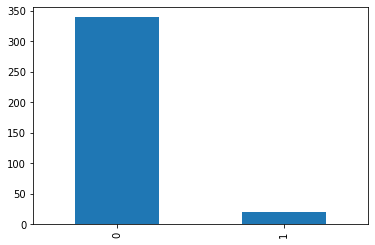

In [47]:
df["flags"].value_counts().plot(kind="bar")

<AxesSubplot:ylabel='flags'>

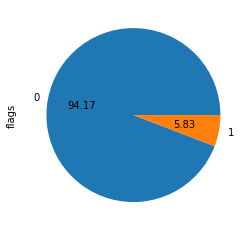

In [48]:
df["flags"].value_counts().plot(kind="pie", autopct="%.2f")

/home/vindia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='maxtd', ylabel='Density'>

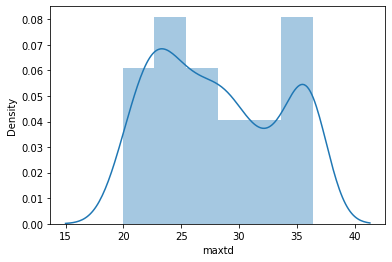

In [49]:
sns.distplot(df["maxtd"])

<AxesSubplot:>

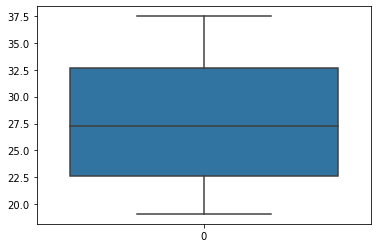

In [21]:
sns.boxplot(df["tipdiff"])

In [24]:
df["tipdiff"].skew()

0.08652474540483304

<AxesSubplot:xlabel='lamda', ylabel='tipdiff'>

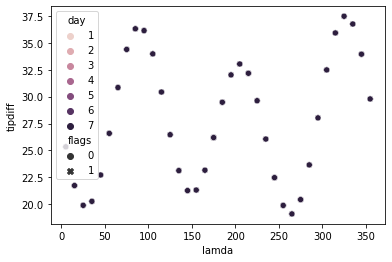

In [35]:
sns.scatterplot(data=df, x='lamda',y='tipdiff',hue='day',style="flags")

<AxesSubplot:xlabel='phi', ylabel='maxtd'>

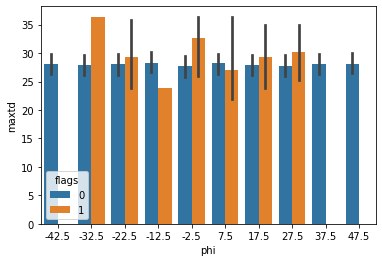

In [50]:
sns.barplot(data=df, x='phi',y='maxtd',hue='flags')

In [107]:
folder_path = "/home/vindia/samapti/cycle24(feb-july)/CR2149/TF3CR"
save_dir = "/home/vindia/samapti/cycle24(feb-july)/CR2149"
txt_files =sorted(glob.glob(os.path.join(folder_path, "*.txt")))
with open(txt_files[2], "r") as f:
    print(txt_files[2])
    data = [ast.literal_eval(line.strip()) for line in f]
df0=pd.DataFrame(data, columns=["patchid", "meantd", "maxtd", "mintd","lamda","phi","day","TFlux","maxTotflux","meanTotflux","flags"])
df0.head()

/home/vindia/samapti/cycle24(feb-july)/CR2149/TF3CR/CR0.txt


,patchid,meantd,maxtd,mintd,lamda,phi,day,TFlux,maxTotflux,meanTotflux,flags
0,564,23.966036,25.495680,22.596793,285.0,-12.5,1,2.169728e+23,6.457557e+20,1.179200e+19,1
1,565,23.966036,25.495680,22.596793,285.0,-2.5,1,1.667119e+23,6.457557e+20,8.867655e+18,1
2,575,25.536088,27.224212,23.939379,290.0,-2.5,1,1.928484e+23,6.457557e+20,1.025789e+19,1
3,625,33.171895,33.977458,32.113608,315.0,-2.5,1,1.468510e+23,5.092293e+20,7.811226e+18,1
4,635,33.908413,34.282423,33.246726,320.0,-2.5,1,1.444461e+23,5.092293e+20,7.683302e+18,1


In [108]:
df0.corr()

,patchid,meantd,maxtd,mintd,lamda,phi,day,TFlux,maxTotflux,meanTotflux,flags
patchid,1.000000,1.992192e-01,1.904745e-01,2.028653e-01,9.999045e-01,1.381928e-02,-0.118440,-0.051166,-0.087763,-0.048946,0.116156
meantd,0.199219,1.000000e+00,9.937242e-01,9.938167e-01,1.992383e-01,-6.223308e-17,0.091502,-0.044889,-0.077765,-0.041231,-0.062347
maxtd,0.190474,9.937242e-01,1.000000e+00,9.752081e-01,1.904927e-01,-5.956100e-17,0.093537,-0.055743,-0.088334,-0.052105,-0.066754
mintd,0.202865,9.938167e-01,9.752081e-01,1.000000e+00,2.028847e-01,-1.054665e-17,0.088720,-0.034395,-0.067079,-0.030775,-0.057451
lamda,0.999905,1.992383e-01,1.904927e-01,2.028847e-01,1.000000e+00,-3.470440e-17,-0.119180,-0.049741,-0.085772,-0.047500,0.117068
phi,0.013819,-6.223308e-17,-5.956100e-17,-1.054665e-17,-3.470440e-17,1.000000e+00,0.052774,-0.103475,-0.144657,-0.104945,-0.065158
day,-0.118440,9.150230e-02,9.353697e-02,8.871975e-02,-1.191802e-01,5.277360e-02,1.000000,-0.037313,-0.111409,-0.036487,-0.829071
TFlux,-0.051166,-4.488851e-02,-5.574268e-02,-3.439510e-02,-4.974071e-02,-1.034747e-01,-0.037313,1.000000,0.783435,0.999559,0.015381
maxTotflux,-0.087763,-7.776501e-02,-8.833360e-02,-6.707934e-02,-8.577173e-02,-1.446575e-01,-0.111409,0.783435,1.000000,0.781588,0.123385
meanTotflux,-0.048946,-4.123103e-02,-5.210495e-02,-3.077475e-02,-4.750012e-02,-1.049455e-01,-0.036487,0.999559,0.781588,1.000000,0.014668


In [109]:
df0.corr(method='pearson')

,patchid,meantd,maxtd,mintd,lamda,phi,day,TFlux,maxTotflux,meanTotflux,flags
patchid,1.000000,1.992192e-01,1.904745e-01,2.028653e-01,9.999045e-01,1.381928e-02,-0.118440,-0.051166,-0.087763,-0.048946,0.116156
meantd,0.199219,1.000000e+00,9.937242e-01,9.938167e-01,1.992383e-01,-6.223308e-17,0.091502,-0.044889,-0.077765,-0.041231,-0.062347
maxtd,0.190474,9.937242e-01,1.000000e+00,9.752081e-01,1.904927e-01,-5.956100e-17,0.093537,-0.055743,-0.088334,-0.052105,-0.066754
mintd,0.202865,9.938167e-01,9.752081e-01,1.000000e+00,2.028847e-01,-1.054665e-17,0.088720,-0.034395,-0.067079,-0.030775,-0.057451
lamda,0.999905,1.992383e-01,1.904927e-01,2.028847e-01,1.000000e+00,-3.470440e-17,-0.119180,-0.049741,-0.085772,-0.047500,0.117068
phi,0.013819,-6.223308e-17,-5.956100e-17,-1.054665e-17,-3.470440e-17,1.000000e+00,0.052774,-0.103475,-0.144657,-0.104945,-0.065158
day,-0.118440,9.150230e-02,9.353697e-02,8.871975e-02,-1.191802e-01,5.277360e-02,1.000000,-0.037313,-0.111409,-0.036487,-0.829071
TFlux,-0.051166,-4.488851e-02,-5.574268e-02,-3.439510e-02,-4.974071e-02,-1.034747e-01,-0.037313,1.000000,0.783435,0.999559,0.015381
maxTotflux,-0.087763,-7.776501e-02,-8.833360e-02,-6.707934e-02,-8.577173e-02,-1.446575e-01,-0.111409,0.783435,1.000000,0.781588,0.123385
meanTotflux,-0.048946,-4.123103e-02,-5.210495e-02,-3.077475e-02,-4.750012e-02,-1.049455e-01,-0.036487,0.999559,0.781588,1.000000,0.014668


In [110]:
df0.corr(method='kendall')

,patchid,meantd,maxtd,mintd,lamda,phi,day,TFlux,maxTotflux,meanTotflux,flags
patchid,1.000000,0.134518,0.117870,0.150965,0.993722,0.013185,-0.095576,-0.034235,-0.028249,-0.031901,0.094907
meantd,0.134518,1.000000,0.963398,0.959280,0.135368,0.000000,0.083286,-0.023650,-0.020331,-0.025633,-0.048912
maxtd,0.117870,0.963398,1.000000,0.922625,0.118614,0.000000,0.087957,-0.022665,-0.020226,-0.024820,-0.053434
mintd,0.150965,0.959280,0.922625,1.000000,0.151919,0.000000,0.081798,-0.023976,-0.019805,-0.025603,-0.048100
lamda,0.993722,0.135368,0.118614,0.151919,1.000000,0.000000,-0.096731,-0.031442,-0.025726,-0.029070,0.096247
phi,0.013185,0.000000,0.000000,0.000000,0.000000,1.000000,0.046491,-0.208430,-0.198696,-0.208967,-0.055798
day,-0.095576,0.083286,0.087957,0.081798,-0.096731,0.046491,1.000000,-0.150401,-0.192749,-0.148463,-0.921502
TFlux,-0.034235,-0.023650,-0.022665,-0.023976,-0.031442,-0.208430,-0.150401,1.000000,0.893203,0.982552,0.156158
maxTotflux,-0.028249,-0.020331,-0.020226,-0.019805,-0.025726,-0.198696,-0.192749,0.893203,1.000000,0.893063,0.207856
meanTotflux,-0.031901,-0.025633,-0.024820,-0.025603,-0.029070,-0.208967,-0.148463,0.982552,0.893063,1.000000,0.154494


In [111]:
df0.corr("spearman")

,patchid,meantd,maxtd,mintd,lamda,phi,day,TFlux,maxTotflux,meanTotflux,flags
patchid,1.000000,0.202727,0.173841,0.230611,0.999905,0.013819,-0.116264,-0.056033,-0.046944,-0.053041,0.116156
meantd,0.202727,1.000000,0.996326,0.996270,0.202746,0.000000,0.102406,-0.035234,-0.032264,-0.038335,-0.059493
maxtd,0.173841,0.996326,1.000000,0.988061,0.173858,0.000000,0.108118,-0.034026,-0.032355,-0.037229,-0.064957
mintd,0.230611,0.996270,0.988061,1.000000,0.230633,0.000000,0.100707,-0.035754,-0.031727,-0.038600,-0.058462
lamda,0.999905,0.202746,0.173858,0.230633,1.000000,0.000000,-0.117032,-0.051853,-0.043016,-0.048826,0.117068
phi,0.013819,0.000000,0.000000,0.000000,0.000000,1.000000,0.054768,-0.302854,-0.284565,-0.305371,-0.065158
day,-0.116264,0.102406,0.108118,0.100707,-0.117032,0.054768,1.000000,-0.185587,-0.238398,-0.183215,-0.929947
TFlux,-0.056033,-0.035234,-0.034026,-0.035754,-0.051853,-0.302854,-0.185587,1.000000,0.980871,0.999230,0.191114
maxTotflux,-0.046944,-0.032264,-0.032355,-0.031727,-0.043016,-0.284565,-0.238398,0.980871,1.000000,0.981165,0.254087
meanTotflux,-0.053041,-0.038335,-0.037229,-0.038600,-0.048826,-0.305371,-0.183215,0.999230,0.981165,1.000000,0.189077


<AxesSubplot:xlabel='maxtd', ylabel='Count'>

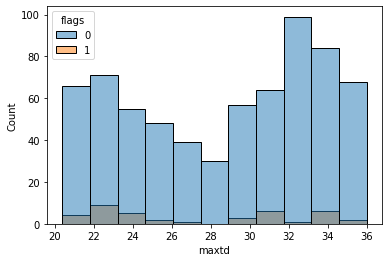

In [112]:
sns.histplot(data=df0, x="maxtd", hue="flags")

In [77]:
df0.shape

(720, 11)

In [78]:
df0["flags"].value_counts()


0    681
1     39
Name: flags, dtype: int64

<AxesSubplot:>

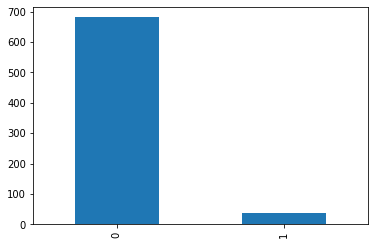

In [79]:
df0["flags"].value_counts().plot(kind="bar")

<AxesSubplot:ylabel='flags'>

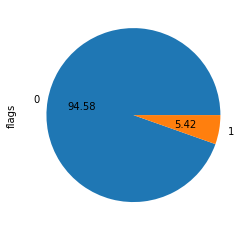

In [80]:
df0["flags"].value_counts().plot(kind="pie", autopct="%.2f")

In [119]:
folder_path = "/home/vindia/samapti/cycle24(feb-july)/CR2149/TF3CR"
save_dir = "/home/vindia/samapti/cycle24(feb-july)/CR2149"
txt_files =sorted(glob.glob(os.path.join(folder_path, "*.txt")))
print(txt_files)


['/home/vindia/samapti/cycle24(feb-july)/CR2149/TF3CR/CR0(360).txt', '/home/vindia/samapti/cycle24(feb-july)/CR2149/TF3CR/CR0(3600).txt', '/home/vindia/samapti/cycle24(feb-july)/CR2149/TF3CR/CR0(4320).txt', '/home/vindia/samapti/cycle24(feb-july)/CR2149/TF3CR/CR0.txt', '/home/vindia/samapti/cycle24(feb-july)/CR2149/TF3CR/CR1.txt', '/home/vindia/samapti/cycle24(feb-july)/CR2149/TF3CR/CR3.txt', '/home/vindia/samapti/cycle24(feb-july)/CR2149/TF3CR/CR4.txt', '/home/vindia/samapti/cycle24(feb-july)/CR2149/TF3CR/CR5.txt', '/home/vindia/samapti/cycle24(feb-july)/CR2149/TF3CR/CR6(3600).txt', '/home/vindia/samapti/cycle24(feb-july)/CR2149/TF3CR/CR6(720).txt', '/home/vindia/samapti/cycle24(feb-july)/CR2149/TF3CR/CR6.txt']


In [81]:
folder_path = "/home/vindia/samapti/cycle24(feb-july)/CR2149/TF3CR"
save_dir = "/home/vindia/samapti/cycle24(feb-july)/CR2149"
txt_files =sorted(glob.glob(os.path.join(folder_path, "*.txt")))
with open(txt_files[0], "r") as f:
    print(txt_files[0])
    data = [ast.literal_eval(line.strip()) for line in f]
df=pd.DataFrame(data, columns=["patchid", "meantd", "maxtd", "mintd","lamda","phi","day","TFlux","maxTotflux","meanTotflux","flags"])
df.head()

/home/vindia/samapti/cycle24(feb-july)/CR2149/TF3CR/CR0(360).txt


,patchid,meantd,maxtd,mintd,lamda,phi,day,TFlux,maxTotflux,meanTotflux,flags
0,284,23.966036,25.495680,22.596793,285.0,-12.5,1,2.169728e+23,6.457557e+20,1.179200e+19,1
1,285,23.966036,25.495680,22.596793,285.0,-2.5,1,1.667119e+23,6.457557e+20,8.867655e+18,1
2,315,33.171895,33.977458,32.113608,315.0,-2.5,1,1.468510e+23,5.092293e+20,7.811226e+18,1
3,156,21.560551,22.151330,21.246170,155.0,7.5,2,2.899707e+22,1.787286e+21,1.550645e+18,1
4,276,21.649647,22.573112,20.986042,275.0,7.5,2,1.329166e+25,8.538824e+21,7.107838e+20,1


In [82]:
df.shape

(360, 11)

In [83]:
df["flags"].value_counts()

0    342
1     18
Name: flags, dtype: int64

<AxesSubplot:>

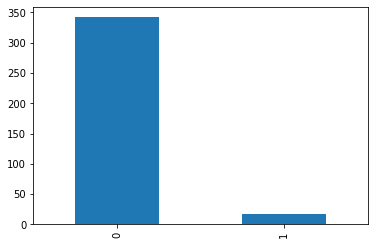

In [84]:
df["flags"].value_counts().plot(kind="bar")

<AxesSubplot:ylabel='flags'>

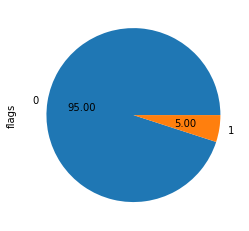

In [85]:
df["flags"].value_counts().plot(kind="pie", autopct="%.2f")

In [113]:
folder_path = "/home/vindia/samapti/cycle24(feb-july)/CR2149/TF3CR"
save_dir = "/home/vindia/samapti/cycle24(feb-july)/CR2149"
txt_files =sorted(glob.glob(os.path.join(folder_path, "*.txt")))
with open(txt_files[1], "r") as f:
    print(txt_files[1])
    data = [ast.literal_eval(line.strip()) for line in f]
df=pd.DataFrame(data, columns=["patchid", "meantd", "maxtd", "mintd","lamda","phi","day","TFlux","maxTotflux","meanTotflux","flags"])
df.head()

/home/vindia/samapti/cycle24(feb-july)/CR2149/TF3CR/CR0(3600).txt


,patchid,meantd,maxtd,mintd,lamda,phi,day,TFlux,maxTotflux,meanTotflux,flags
0,74,22.849129,23.595892,22.148373,8.5,20.0,1,1.165895e+22,1.645506e+21,1.976094e+18,1
1,90,22.282893,22.971383,21.646611,10.5,0.0,1,3.659663e+21,3.591975e+20,5.855461e+17,1
2,110,21.769824,22.392358,21.205156,12.5,0.0,1,8.703251e+21,3.591975e+20,1.392520e+18,1
3,130,21.315682,21.865265,20.829020,14.5,0.0,1,8.104269e+21,3.591975e+20,1.296683e+18,1
4,190,20.354876,20.651585,20.132103,20.5,0.0,1,1.339399e+21,2.097400e+20,2.143038e+17,1


<AxesSubplot:xlabel='maxtd', ylabel='Count'>

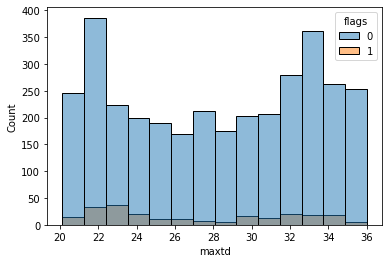

In [114]:
sns.histplot(data=df, x="maxtd", hue="flags")

<AxesSubplot:xlabel='flags', ylabel='maxtd'>

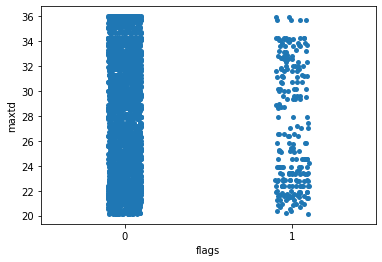

In [116]:
sns.stripplot(x="flags", y="maxtd", data=df)

In [117]:
maxtd_flag1 = df[df["flags"] == 1]["maxtd"]
maxtd_flag0 = df[df["flags"] == 0]["maxtd"]

In [101]:
df.shape


(3600, 11)

In [102]:
df["flags"].value_counts()

0    3368
1     232
Name: flags, dtype: int64

<AxesSubplot:ylabel='flags'>

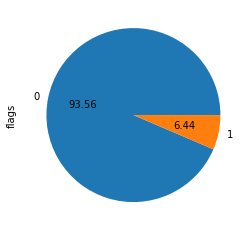

In [103]:
df["flags"].value_counts().plot(kind="pie", autopct="%.2f")

In [105]:
df.corr()

,patchid,meantd,maxtd,mintd,lamda,phi,day,TFlux,maxTotflux,meanTotflux,flags
patchid,1.000000,2.011391e-01,1.977019e-01,2.032812e-01,9.999846e-01,5.548607e-03,-0.083243,-0.033995,-0.038136,-0.033102,0.105861
meantd,0.201139,1.000000e+00,9.984590e-01,9.984598e-01,2.011422e-01,9.759827e-17,0.064569,-0.045810,-0.066344,-0.043784,-0.059692
maxtd,0.197702,9.984590e-01,1.000000e+00,9.938442e-01,1.977049e-01,2.055814e-16,0.064585,-0.049147,-0.070502,-0.047143,-0.060449
mintd,0.203281,9.984598e-01,9.938442e-01,1.000000e+00,2.032843e-01,7.379010e-17,0.064398,-0.042463,-0.062122,-0.040424,-0.058851
lamda,0.999985,2.011422e-01,1.977049e-01,2.032843e-01,1.000000e+00,4.637558e-17,-0.083475,-0.033627,-0.037652,-0.032728,0.106138
phi,0.005549,9.759827e-17,2.055814e-16,7.379010e-17,4.637558e-17,1.000000e+00,0.041578,-0.066430,-0.087383,-0.067442,-0.049636
day,-0.083243,6.456928e-02,6.458486e-02,6.439812e-02,-8.347457e-02,4.157823e-02,1.000000,-0.082191,-0.195680,-0.081374,-0.877352
TFlux,-0.033995,-4.580991e-02,-4.914731e-02,-4.246318e-02,-3.362712e-02,-6.643040e-02,-0.082191,1.000000,0.780284,0.999756,0.126657
maxTotflux,-0.038136,-6.634358e-02,-7.050205e-02,-6.212211e-02,-3.765218e-02,-8.738269e-02,-0.195680,0.780284,1.000000,0.780038,0.264784
meanTotflux,-0.033102,-4.378409e-02,-4.714279e-02,-4.042428e-02,-3.272799e-02,-6.744243e-02,-0.081374,0.999756,0.780038,1.000000,0.126222


In [120]:
folder_path = "/home/vindia/samapti/cycle24(feb-july)/CR2149/TF3CR"
save_dir = "/home/vindia/samapti/cycle24(feb-july)/CR2149"
txt_files =sorted(glob.glob(os.path.join(folder_path, "*.txt")))
with open(txt_files[2], "r") as f:
    print(txt_files[2])
    data = [ast.literal_eval(line.strip()) for line in f]
df=pd.DataFrame(data, columns=["patchid", "meantd", "maxtd", "mintd","lamda","phi","day","TFlux","maxTotflux","meanTotflux","flags"])
df.head()

/home/vindia/samapti/cycle24(feb-july)/CR2149/TF3CR/CR0(4320).txt


,patchid,meantd,maxtd,mintd,lamda,phi,day,TFlux,maxTotflux,meanTotflux,flags
0,88,22.849129,23.595892,22.148373,8.5,20.0,1,1.165895e+22,1.645506e+21,1.976094e+18,1
1,108,22.282893,22.971383,21.646611,10.5,0.0,1,3.659663e+21,3.591975e+20,5.855461e+17,1
2,132,21.769824,22.392358,21.205156,12.5,0.0,1,8.703251e+21,3.591975e+20,1.392520e+18,1
3,156,21.315682,21.865265,20.829020,14.5,0.0,1,8.104269e+21,3.591975e+20,1.296683e+18,1
4,228,20.354876,20.651585,20.132103,20.5,0.0,1,1.339399e+21,2.097400e+20,2.143038e+17,1


In [121]:
df.shape

(4320, 11)

<AxesSubplot:ylabel='flags'>

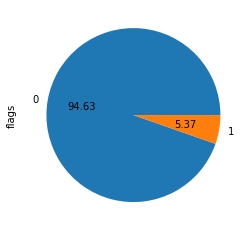

In [122]:
df["flags"].value_counts().plot(kind="pie", autopct="%.2f")

In [88]:
folder_path = "/home/vindia/samapti/cycle24(feb-july)/CR2149/TF3CR"
save_dir = "/home/vindia/samapti/cycle24(feb-july)/CR2149"
txt_files =sorted(glob.glob(os.path.join(folder_path, "*.txt")))
with open(txt_files[6], "r") as f:
    print(txt_files[6])
    data = [ast.literal_eval(line.strip()) for line in f]
df5=pd.DataFrame(data, columns=["patchid", "meantd", "maxtd", "mintd","lamda","phi","day","TFlux","maxTotflux","meanTotflux","flags"])
df5.head()

/home/vindia/samapti/cycle24(feb-july)/CR2149/TF3CR/CR6(720).txt


,patchid,meantd,maxtd,mintd,lamda,phi,day,TFlux,maxTotflux,meanTotflux,flags
0,192,34.451709,35.623047,33.026710,100.0,-32.5,1,2.411142e+21,4.947634e+20,1.526039e+17,1
1,197,34.451709,35.623047,33.026710,100.0,17.5,1,4.491611e+22,1.791793e+21,2.509280e+18,1
2,435,27.690267,29.268747,25.977279,220.0,-2.5,1,3.299734e+23,4.083579e+21,1.755177e+19,1
3,595,37.519081,39.950032,34.860143,300.0,-2.5,1,1.014058e+22,4.258954e+20,5.393924e+17,1
4,612,41.770648,43.156028,39.993399,310.0,-32.5,1,1.091839e+22,4.200894e+20,6.910376e+17,1


In [89]:
df5.shape


(720, 11)

In [90]:
df5["flags"].value_counts()

0    671
1     49
Name: flags, dtype: int64

<AxesSubplot:ylabel='flags'>

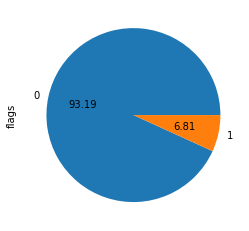

In [91]:
df5["flags"].value_counts().plot(kind="pie", autopct="%.2f")

In [ ]:
df.corr()

In [95]:
folder_path = "/home/vindia/samapti/cycle24(feb-july)/CR2149/TF3CR"
save_dir = "/home/vindia/samapti/cycle24(feb-july)/CR2149"
txt_files =sorted(glob.glob(os.path.join(folder_path, "*.txt")))
with open(txt_files[6], "r") as f:
    print(txt_files[6])
    data = [ast.literal_eval(line.strip()) for line in f]
df6=pd.DataFrame(data, columns=["patchid", "meantd", "maxtd", "mintd","lamda","phi","day","TFlux","maxTotflux","meanTotflux","flags"])
df6.head()

/home/vindia/samapti/cycle24(feb-july)/CR2149/TF3CR/CR6(3600).txt


,patchid,meantd,maxtd,mintd,lamda,phi,day,TFlux,maxTotflux,meanTotflux,flags
0,154,20.785147,21.513406,20.152446,16.5,20.0,1,1.734711e+22,2.373632e+20,2.940188e+18,1
1,155,20.785147,21.513406,20.152446,16.5,25.0,1,1.437431e+22,2.373632e+20,2.544126e+18,1
2,823,36.319787,36.392868,36.160475,84.5,-35.0,1,7.346699e+20,2.563551e+20,1.426543e+17,1
3,1184,27.157028,28.093048,26.242644,120.5,-30.0,1,1.827813e+21,2.378926e+20,3.384839e+17,1
4,1470,21.661706,21.814014,21.581604,148.5,0.0,1,5.074537e+21,2.048819e+21,8.119259e+17,1


In [96]:
df6.shape

(3600, 11)

In [97]:
df6["flags"].value_counts()

0    3329
1     271
Name: flags, dtype: int64

<AxesSubplot:ylabel='flags'>

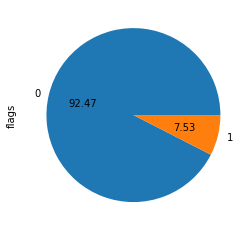

In [98]:
df6["flags"].value_counts().plot(kind="pie", autopct="%.2f")

In [123]:
folder_path = "/home/vindia/samapti/cycle24(feb-july)/CR2149/ARD/TF3CR"
save_dir = "/home/vindia/samapti/cycle24(feb-july)/CR2149"
txt_files =sorted(glob.glob(os.path.join(folder_path, "*.txt")))
print(txt_files)

['/home/vindia/samapti/cycle24(feb-july)/CR2149/ARD/TF3CR/CR0(360).txt', '/home/vindia/samapti/cycle24(feb-july)/CR2149/ARD/TF3CR/CR0(3600).txt', '/home/vindia/samapti/cycle24(feb-july)/CR2149/ARD/TF3CR/CR0(4320).txt', '/home/vindia/samapti/cycle24(feb-july)/CR2149/ARD/TF3CR/CR0.txt', '/home/vindia/samapti/cycle24(feb-july)/CR2149/ARD/TF3CR/CR1.txt', '/home/vindia/samapti/cycle24(feb-july)/CR2149/ARD/TF3CR/CR3.txt', '/home/vindia/samapti/cycle24(feb-july)/CR2149/ARD/TF3CR/CR4.txt', '/home/vindia/samapti/cycle24(feb-july)/CR2149/ARD/TF3CR/CR5.txt', '/home/vindia/samapti/cycle24(feb-july)/CR2149/ARD/TF3CR/CR6(3600).txt', '/home/vindia/samapti/cycle24(feb-july)/CR2149/ARD/TF3CR/CR6(720).txt', '/home/vindia/samapti/cycle24(feb-july)/CR2149/ARD/TF3CR/CR6.txt']


In [133]:
with open(txt_files[0], "r") as f:
    print(txt_files[0])
    data = [ast.literal_eval(line.strip()) for line in f]
df0=pd.DataFrame(data, columns=["patchid", "meantd", "maxtd", "mintd","lamda","phi","day","TFlux","maxTotflux","meanTotflux","flags"])
df0.head()

/home/vindia/samapti/cycle24(feb-july)/CR2149/ARD/TF3CR/CR0(360).txt


,patchid,meantd,maxtd,mintd,lamda,phi,day,TFlux,maxTotflux,meanTotflux,flags
0,284,23.966036,25.495680,22.596793,285.0,-12.5,1,2.169728e+23,6.457557e+20,1.179200e+19,1
1,285,23.966036,25.495680,22.596793,285.0,-2.5,1,1.667119e+23,6.457557e+20,8.867655e+18,1
2,315,33.171895,33.977458,32.113608,315.0,-2.5,1,1.468510e+23,5.092293e+20,7.811226e+18,1
3,156,21.560551,22.151330,21.246170,155.0,7.5,2,2.899707e+22,1.787286e+21,1.550645e+18,1
4,276,21.649647,22.573112,20.986042,275.0,7.5,2,1.329166e+25,8.538824e+21,7.107838e+20,1


In [134]:
df0.shape

(360, 11)

In [135]:
df0["flags"].value_counts()

0    342
1     18
Name: flags, dtype: int64

<AxesSubplot:ylabel='flags'>

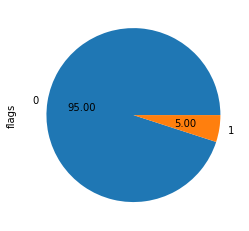

In [136]:
df0["flags"].value_counts().plot(kind="pie", autopct="%.2f")

In [130]:
with open(txt_files[1], "r") as f:
    print(txt_files[1])
    data = [ast.literal_eval(line.strip()) for line in f]
df1=pd.DataFrame(data, columns=["patchid", "meantd", "maxtd", "mintd","lamda","phi","day","TFlux","maxTotflux","meanTotflux","flags"])
df1.head()

/home/vindia/samapti/cycle24(feb-july)/CR2149/ARD/TF3CR/CR0(3600).txt


,patchid,meantd,maxtd,mintd,lamda,phi,day,TFlux,maxTotflux,meanTotflux,flags
0,74,22.849129,23.595892,22.148373,8.5,20.0,1,1.165895e+22,1.645506e+21,1.976094e+18,1
1,90,22.282893,22.971383,21.646611,10.5,0.0,1,3.659663e+21,3.591975e+20,5.855461e+17,1
2,110,21.769824,22.392358,21.205156,12.5,0.0,1,8.703251e+21,3.591975e+20,1.392520e+18,1
3,130,21.315682,21.865265,20.829020,14.5,0.0,1,8.104269e+21,3.591975e+20,1.296683e+18,1
4,190,20.354876,20.651585,20.132103,20.5,0.0,1,1.339399e+21,2.097400e+20,2.143038e+17,1


In [131]:
df1["flags"].value_counts()

0    3368
1     232
Name: flags, dtype: int64

<AxesSubplot:ylabel='flags'>

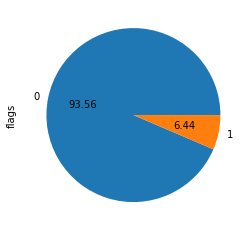

In [132]:
df1["flags"].value_counts().plot(kind="pie", autopct="%.2f")

In [137]:
with open(txt_files[2], "r") as f:
    print(txt_files[2])
    data = [ast.literal_eval(line.strip()) for line in f]
df2=pd.DataFrame(data, columns=["patchid", "meantd", "maxtd", "mintd","lamda","phi","day","TFlux","maxTotflux","meanTotflux","flags"])
df2.head()

/home/vindia/samapti/cycle24(feb-july)/CR2149/ARD/TF3CR/CR0(4320).txt


,patchid,meantd,maxtd,mintd,lamda,phi,day,TFlux,maxTotflux,meanTotflux,flags
0,88,22.849129,23.595892,22.148373,8.5,20.0,1,1.165895e+22,1.645506e+21,1.976094e+18,1
1,108,22.282893,22.971383,21.646611,10.5,0.0,1,3.659663e+21,3.591975e+20,5.855461e+17,1
2,132,21.769824,22.392358,21.205156,12.5,0.0,1,8.703251e+21,3.591975e+20,1.392520e+18,1
3,156,21.315682,21.865265,20.829020,14.5,0.0,1,8.104269e+21,3.591975e+20,1.296683e+18,1
4,228,20.354876,20.651585,20.132103,20.5,0.0,1,1.339399e+21,2.097400e+20,2.143038e+17,1


In [138]:
df2["flags"].value_counts()

0    4088
1     232
Name: flags, dtype: int64

<AxesSubplot:ylabel='flags'>

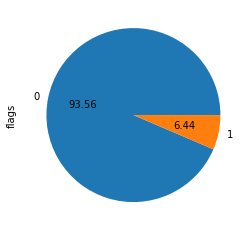

In [139]:
df1["flags"].value_counts().plot(kind="pie", autopct="%.2f")